<a href="https://colab.research.google.com/github/Anjanamb/A04/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [63]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Transform images from (width, width, 3) to 3072-dimensional vectors (width*width*3)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
batch_size = Ntr

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)


In [64]:
iterations = 300 # epochs
lr = 0.019  # learning rate
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]    
    y_pred = x.dot(w1) +b1
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w1 * w1))
    loss_history.append(loss)
    if t % 10 == 0:
        print('Iteration %d / %d: loss %f' % (t, iterations, loss))
    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred -y) # partial derivative of L w.r.t y_hat
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay

Iteration 0 / 300: loss 0.999970
Iteration 10 / 300: loss 0.935667
Iteration 20 / 300: loss 1.133909
Iteration 30 / 300: loss 1.668768
Iteration 40 / 300: loss 2.424529
Iteration 50 / 300: loss 2.862563
Iteration 60 / 300: loss 2.557247
Iteration 70 / 300: loss 1.797399
Iteration 80 / 300: loss 1.172140
Iteration 90 / 300: loss 0.885751
Iteration 100 / 300: loss 0.804980
Iteration 110 / 300: loss 0.789993
Iteration 120 / 300: loss 0.787608
Iteration 130 / 300: loss 0.786787
Iteration 140 / 300: loss 0.786146
Iteration 150 / 300: loss 0.785569
Iteration 160 / 300: loss 0.785041
Iteration 170 / 300: loss 0.784556
Iteration 180 / 300: loss 0.784108
Iteration 190 / 300: loss 0.783691
Iteration 200 / 300: loss 0.783304
Iteration 210 / 300: loss 0.782941
Iteration 220 / 300: loss 0.782600
Iteration 230 / 300: loss 0.782280
Iteration 240 / 300: loss 0.781978
Iteration 250 / 300: loss 0.781692
Iteration 260 / 300: loss 0.781421
Iteration 270 / 300: loss 0.781163
Iteration 280 / 300: loss 0.780

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

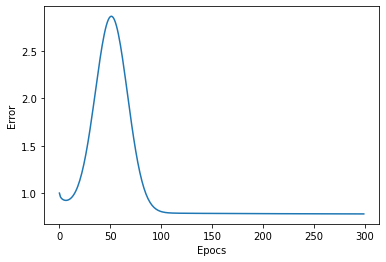

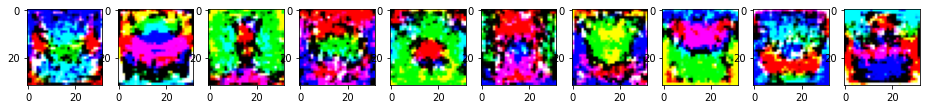

x_train -> (50000, 3072)
train_acc =  0.7570933333333334
train_loss =  0.7804601677105009
x_test -> (10000, 3072)
test_acc =  0.7495555555555555
test_loss =  0.7864828776964041


In [65]:
# Printing accuracies and displaying w as images
plt.plot(loss_history)
plt.xlabel('Epocs')
plt.ylabel('Error')
f, axarr = plt.subplots(1,10)
f.set_size_inches(16, 6)

for i in range(10):
    img = w1[:, i].reshape(32, 32, 3) # CIFAR10
    #img = w1[:, i].reshape(28, 28) # MNIST
    axarr[i].imshow(img*1000)
plt.show()

x_t = x_train
print("x_train ->", x_t.shape)
y_pred = x_t.dot(w1) + b1

tacc = 1.0 -1/(Ntr*9)*(np.abs(np.argmax(y_train, axis=1) - np.argmax(y_pred, axis=1))).sum()
tr_loss = 1./Ntr*np.square(y_pred-y_train).sum() + reg * (np.sum(w1 * w1))
print("train_acc = ", tacc)
print("train_loss = ", tr_loss)

x_t = x_test
print("x_test ->", x_t.shape)
y_pred= x_t.dot(w1) + b1

tacc = 1.0 - 1/(Nte*9)*(np.abs(np.argmax(y_test, axis=1) - np.argmax(y_pred, axis=1))).sum()
ts_loss = 1./Nte*np.square(y_pred-y_test).sum() + reg * (np.sum(w1 * w1))
print("test_acc = ", tacc)
print("test_loss = ", ts_loss)